In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import roc_curve, auc
import tensorflow as tf

# from tensorflow import keras
from sklearn.metrics import classification_report
import seaborn as sns
from matplotlib import pyplot as plt

In [28]:
df = pd.read_csv("dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(f'No of rows/training examples: {df.shape[0]}, No of columns/features: {df.shape[1]}')
df.sample(5)

No of rows/training examples: 7043, No of columns/features: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3656,4039-PIMHX,Male,1,Yes,No,49,Yes,No,DSL,No,...,No,No,No,No,Two year,No,Mailed check,49.80,2398.4,No
2254,7322-OCWHC,Male,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),93.05,6735.05,No
3867,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.7,No
4271,2819-GWENI,Female,0,Yes,Yes,28,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.90,543,No
108,8597-CWYHH,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,No,Mailed check,94.35,3921.3,No



# Exploratory Data Analysis <a id ="6"></a>

In [29]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [30]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Text(0.5, 1.0, '26.54 % (1869 nos) of customers will churn & 73.46 % (5174 nos) of customers will retain')

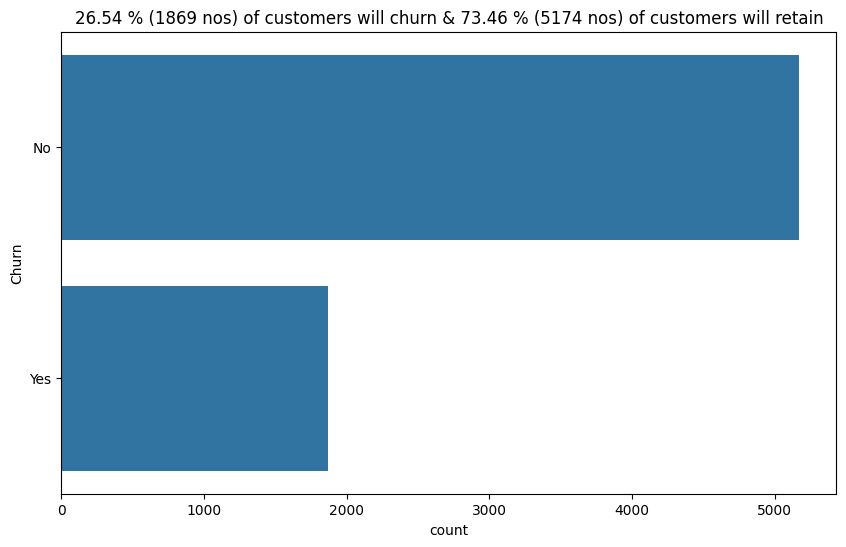

In [31]:
# Count of customer that will churn
cust_churn_yes_count = df[df.Churn == 'Yes'].shape[0]
# Count of customer that will not churn (retain)
cust_churn_no_count = df[df.Churn == 'No'].shape[0]

# Percentage of customer that will churn
cust_churn_yes_percent = round((cust_churn_yes_count / (cust_churn_yes_count + cust_churn_no_count) * 100),2)
# Percentage of customer that will not churn (retain)
cust_churn_no_percent = round((cust_churn_no_count / (cust_churn_yes_count + cust_churn_no_count) * 100 ),2)

plt.figure(figsize=(10,6))
ax = sns.countplot(df['Churn'])
ax.set_title(f'{cust_churn_yes_percent} % ({cust_churn_yes_count} nos) of customers will churn & {cust_churn_no_percent} % ({cust_churn_no_count} nos) of customers will retain')

Effect of other available features on the customer retention.

Text(0.5, 1.0, 'Effect of Gender on customer churn')

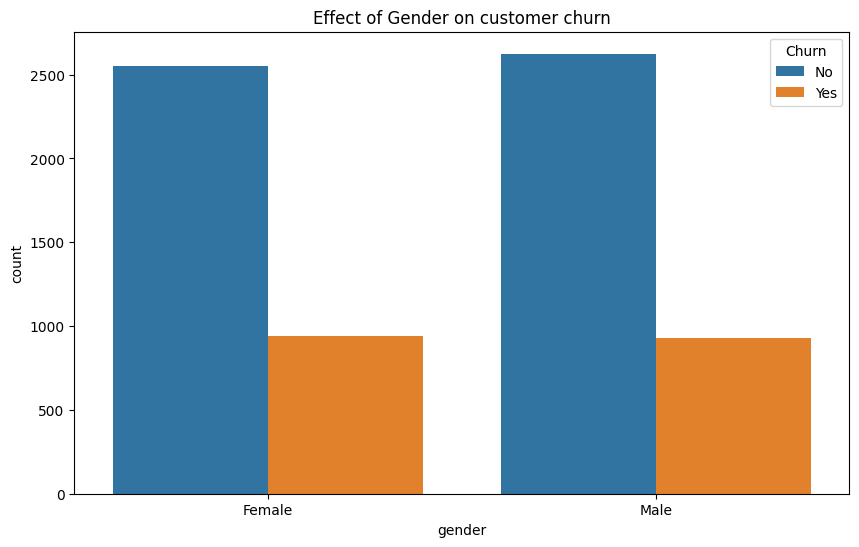

In [32]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'gender', hue='Churn', data=df)
ax.set_title(f'Effect of Gender on customer churn')

As you can see customer gender doesn't seem to affecting churn count. Since we have separate columns for senior citizens let check the churn rate for them.

Text(0.5, 0, 'SeniorCitizens(0: No, 1: Yes)')

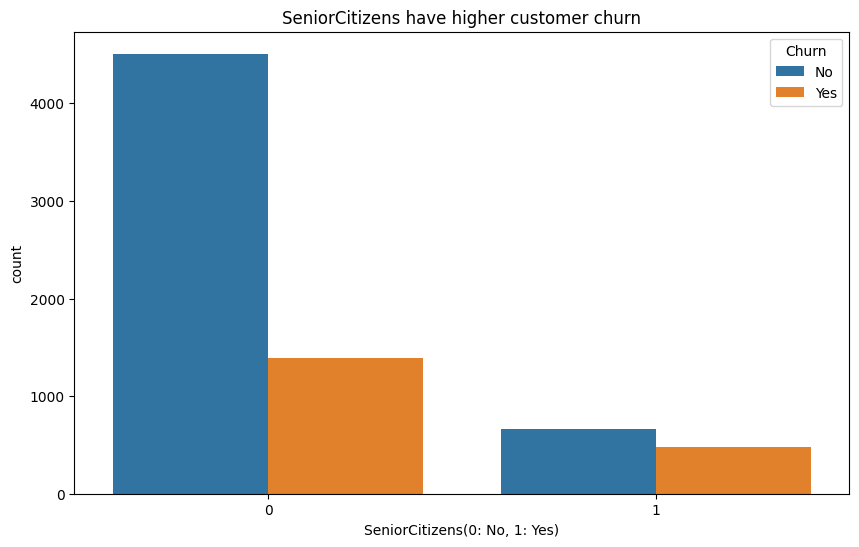

In [33]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'SeniorCitizen', hue='Churn', data=df)
ax.set_title(f'SeniorCitizens have higher customer churn')
plt.xlabel('SeniorCitizens(0: No, 1: Yes)')

As we can see from above graph that senior citizens though being few in number have higher customer churn percentage. Now let check the effect of internet service on churn count.

Text(0.5, 1.0, 'Effect of internet service on customer churn')

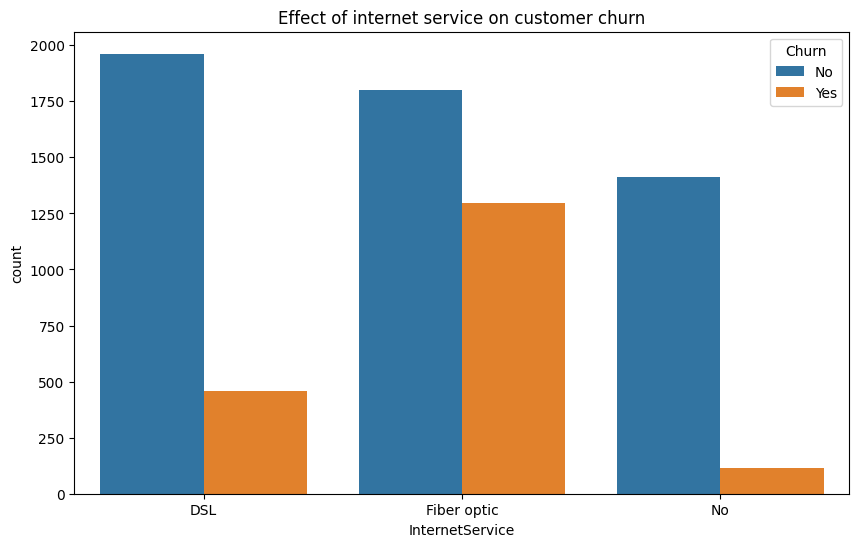

In [34]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'InternetService', hue='Churn', data=df)
ax.set_title(f'Effect of internet service on customer churn')

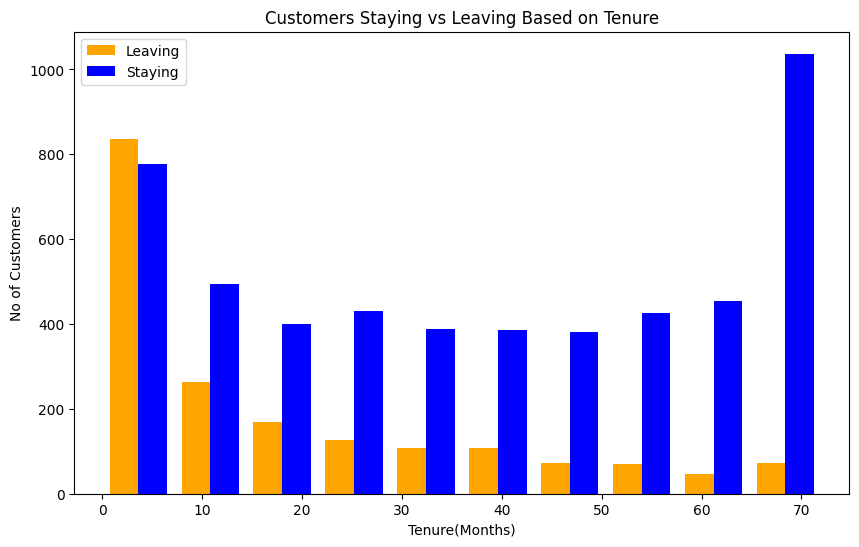

In [35]:
tenure_churn_yes = df[df.Churn == 'Yes'].tenure
tenure_churn_no = df[df.Churn == 'No'].tenure

plt.figure(figsize=(10,6))
plt.hist([tenure_churn_yes, tenure_churn_no], color=['orange', 'blue'], label= ['Leaving', 'Staying'])
plt.xlabel('Tenure(Months)')
plt.ylabel('No of Customers')
plt.title('Customers Staying vs Leaving Based on Tenure')
plt.legend()

From above histogram it's clear that more number of customers tend to stay with the company after the first 10 months of service. So the company can concentrate more on the new customer and their initial experience with the service to increase the customer retention.

Let's also visualize the customer churn with respect to monthly charges.

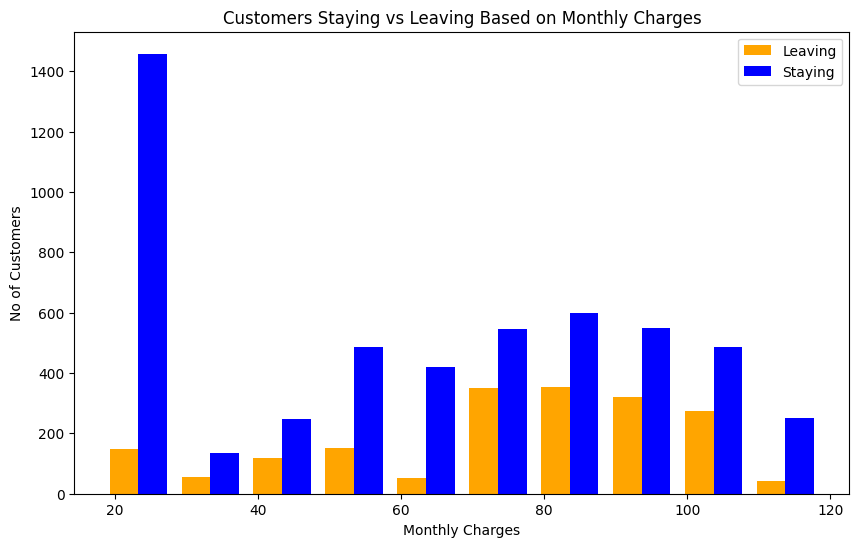

In [36]:
monthly_charges_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges
monthly_charges_churn_no = df[df.Churn == 'No'].MonthlyCharges


plt.figure(figsize=(10,6))
plt.hist([monthly_charges_churn_yes, monthly_charges_churn_no], color=['orange', 'blue'], label= ['Leaving', 'Staying'])
plt.xlabel('Monthly Charges')
plt.ylabel('No of Customers')
plt.title('Customers Staying vs Leaving Based on Monthly Charges')
plt.legend()

As you see from above histogram for lowest monthly rates(between 20 and 40) highest is the customer retention. But customer attrition increases for monthly charges between 70 and 100. So the company can reduce the monthly charges or add more value to the service for the same price to increase the customer retention.

## Data Cleaning & Preprocessing <a id ="9"></a>
Data visualization gave us idea about the features which are affecting the customer churn. Now let's clean and precess the data to make it ready for modeling.

### Feature Selection <a id ="10"></a>

In [37]:
df1 = df.drop('customerID', axis = 'columns')
df1.shape # Print the shape of new dataframe

(7043, 20)

Now our dataset contains 7043 training examples and 20 features. Now let's review the data types of the features.

### Feature Encoding <a id ="11"></a>

In [38]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Let check the values present in 'TotalCharges' column and change the data type to numeric. 

In [39]:
# Print the values in TotalCharges
df1.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

As you can see total charges value is in string format. But there is one more interesting thing about these values. For 11 customers total charges value is blank!! To know more about it lets print those values.

In [40]:
# Print rows with missing TotalCharges values
df1[df1.TotalCharges == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Note that for all above customers tenure is 0 months, that means they are new customers!! Total charges will be available for them after first month of service. Now instead of deleting these training examples we can add 0 as total charges!

In [41]:
df1.TotalCharges =  df1.TotalCharges.replace(r' ', '0')
df1[df1.tenure == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


Now we have updated the missing value lets change the datatype of the total charges column to numeric.

In [42]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
print(f'New datatype of TotalCharges : { df1.TotalCharges.dtype}')    

New datatype of TotalCharges : float64


### Transform Categorical Values <a id ="12"></a>

In [43]:
def print_unique_col_values(df):
    """Print unique values from categorical columns of the given dataframe"""
    print('Unique values from categorical columns,\n')
    for column in df.columns:
        if(df[column].dtypes == 'object'): 
            print(f'column: {column}, Unique vlaues: {df[column].unique()}')
        
print_unique_col_values(df1)

Unique values from categorical columns,

column: gender, Unique vlaues: ['Female' 'Male']
column: Partner, Unique vlaues: ['Yes' 'No']
column: Dependents, Unique vlaues: ['No' 'Yes']
column: PhoneService, Unique vlaues: ['No' 'Yes']
column: MultipleLines, Unique vlaues: ['No phone service' 'No' 'Yes']
column: InternetService, Unique vlaues: ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity, Unique vlaues: ['No' 'Yes' 'No internet service']
column: OnlineBackup, Unique vlaues: ['Yes' 'No' 'No internet service']
column: DeviceProtection, Unique vlaues: ['No' 'Yes' 'No internet service']
column: TechSupport, Unique vlaues: ['No' 'Yes' 'No internet service']
column: StreamingTV, Unique vlaues: ['No' 'Yes' 'No internet service']
column: StreamingMovies, Unique vlaues: ['No' 'Yes' 'No internet service']
column: Contract, Unique vlaues: ['Month-to-month' 'One year' 'Two year']
column: PaperlessBilling, Unique vlaues: ['Yes' 'No']
column: PaymentMethod, Unique vlaues: ['Electronic check' 'Mail

Now lets replace 'No phone service' with 'No' in column MultipleLines and  ''No internet service' with 'no' in columns OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies. We can run this replaces, directly on the dataframe.

In [44]:
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True)
# Lets print unique values again
print_unique_col_values(df1)

Unique values from categorical columns,

column: gender, Unique vlaues: ['Female' 'Male']
column: Partner, Unique vlaues: ['Yes' 'No']
column: Dependents, Unique vlaues: ['No' 'Yes']
column: PhoneService, Unique vlaues: ['No' 'Yes']
column: MultipleLines, Unique vlaues: ['No' 'Yes']
column: InternetService, Unique vlaues: ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity, Unique vlaues: ['No' 'Yes']
column: OnlineBackup, Unique vlaues: ['Yes' 'No']
column: DeviceProtection, Unique vlaues: ['No' 'Yes']
column: TechSupport, Unique vlaues: ['No' 'Yes']
column: StreamingTV, Unique vlaues: ['No' 'Yes']
column: StreamingMovies, Unique vlaues: ['No' 'Yes']
column: Contract, Unique vlaues: ['Month-to-month' 'One year' 'Two year']
column: PaperlessBilling, Unique vlaues: ['Yes' 'No']
column: PaymentMethod, Unique vlaues: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
column: Churn, Unique vlaues: ['No' 'Yes']


All our categorical values don't have any numeric order or relationship between them, means these 'Nominal  Categorical Values'. We should use One Hot Encoding instead of label encoding to convert them into numeric format. Since Churn contains our class labels we can manually assign numeric values to it.

In [45]:
# Converting churn to numeric
df1['Churn'].replace({'Yes': 1,'No': 0},inplace=True)

In [46]:
# Create df2 for cleaned dataset
df2 = pd.get_dummies(data = df1)

print(f'So we have added {df2.shape[1]- df1.shape[1]} more columns to our list. New shape : {df2.shape}')
df2.sample(5)

So we have added 19 more columns to our list. New shape : (7043, 39)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2017,0,38,20.40,743.5,0,False,True,False,True,True,...,False,False,False,True,True,False,True,False,False,False
741,0,2,80.45,137.1,0,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
722,0,4,85.95,381.3,1,True,False,False,True,False,...,True,True,False,False,False,True,False,False,True,False
1375,0,39,19.85,854.8,0,True,False,False,True,False,...,False,False,False,True,False,True,True,False,False,False
4944,0,10,24.40,253.9,0,False,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True


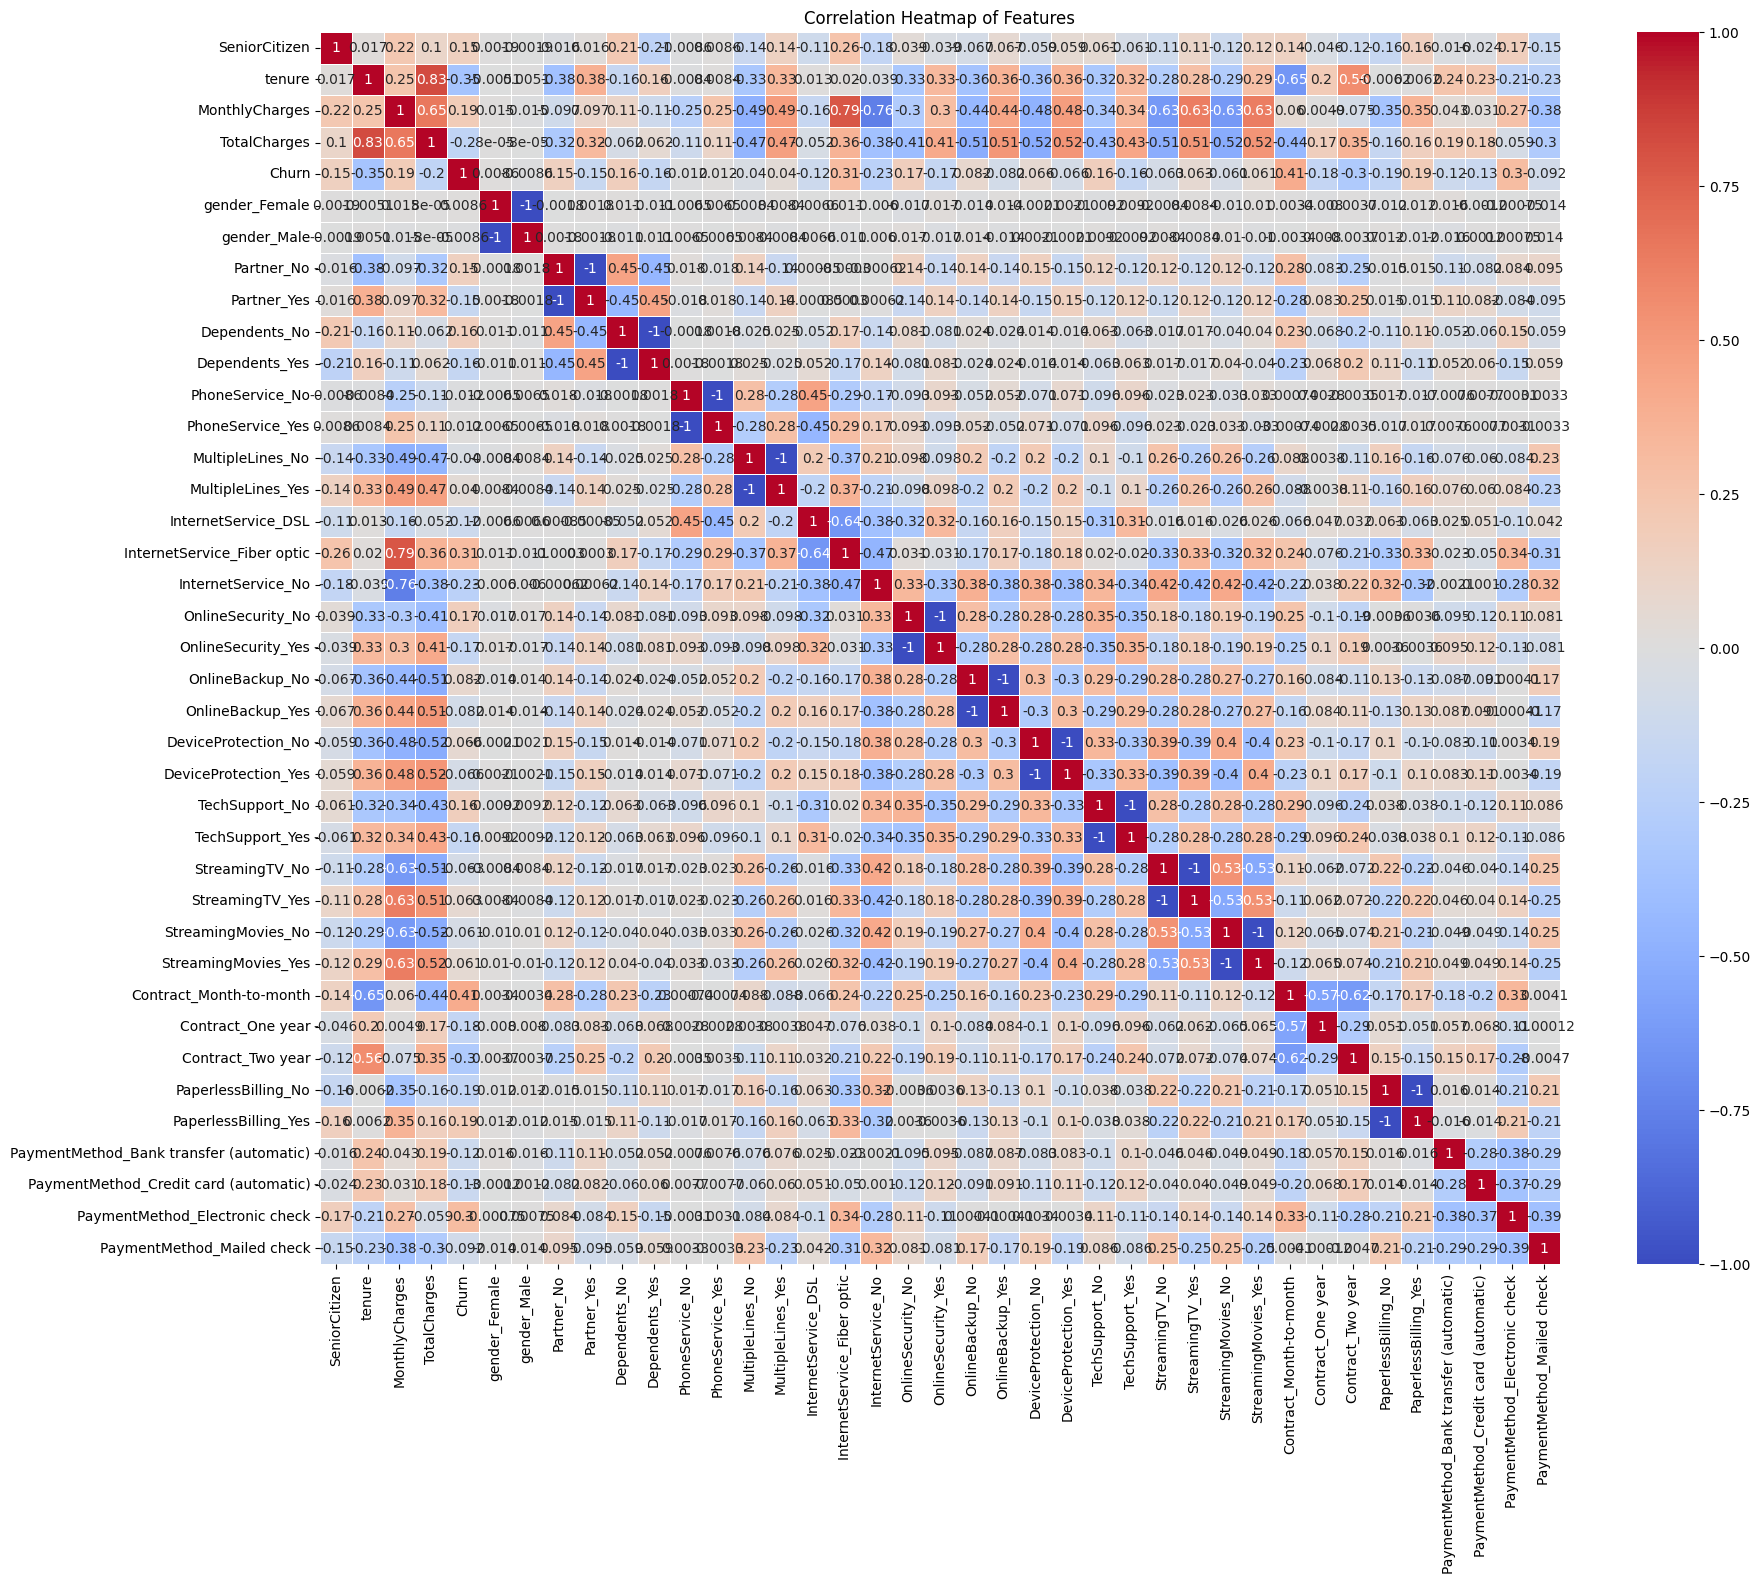

Features with high correlation to Churn:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'TechSupport_No', 'TechSupport_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check']


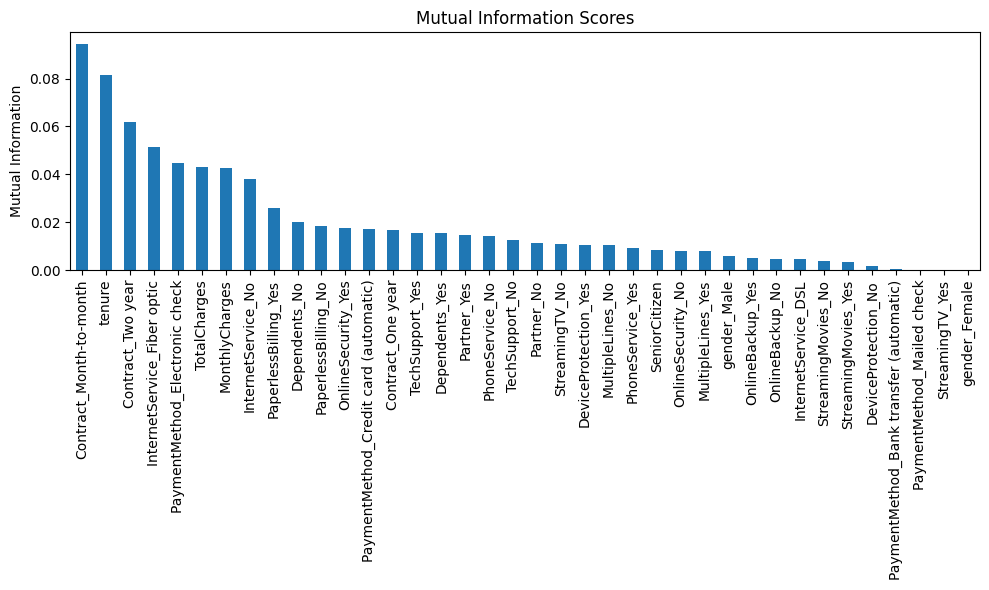


Top 10 features by Mutual Information:
Contract_Month-to-month           0.094599
tenure                            0.081527
Contract_Two year                 0.062016
InternetService_Fiber optic       0.051455
PaymentMethod_Electronic check    0.044544
TotalCharges                      0.042875
MonthlyCharges                    0.042464
InternetService_No                0.038047
PaperlessBilling_Yes              0.026059
Dependents_No                     0.020034
Name: MI Scores, dtype: float64


In [47]:
# Correlation Analysis
correlation_matrix = df2.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Select features with correlation > 0.1 or < -0.1 with 'Churn'
high_corr_features = correlation_matrix['Churn'][abs(correlation_matrix['Churn']) > 0.1].index.tolist()
high_corr_features.remove('Churn')  # Remove 'Churn' itself from the list

print("Features with high correlation to Churn:")
print(high_corr_features)

# Mutual Information
X = df2.drop('Churn', axis=1)
y = df2['Churn']

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
mi_scores.plot.bar()
plt.title('Mutual Information Scores')
plt.ylabel('Mutual Information')
plt.tight_layout()
plt.show()

print("\nTop 10 features by Mutual Information:")
print(mi_scores.nlargest(10))

### Scaling & Normalization <a id ="13"></a>
In this step we are going identify the features who need to be scaled and scale them using sklearn's MinMaxScaler. Scaling is used to standardize the range of input features so that our machine learning model can quickly learn from the data.
In our case features tenure, MonthlyCharges and TotalCharges need to be scaled.

In [48]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale]) # Fit to data, then transform it
df2[cols_to_scale].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,0.449599,0.462803,0.262497
std,0.341104,0.299403,0.261007
min,0.000000,0.000000,0.000000
25%,0.125000,0.171642,0.045891
50%,0.402778,0.518408,0.160574
75%,0.763889,0.712438,0.436003
max,1.000000,1.000000,1.000000


As you can see now all our feature values are in the range of 0 to 1. Now let's prepare the training and testing data set for modeling.

# Train Test Split <a id ="14"></a>
We are going to create train and test datasets for training and testing respectively. Training dataset will have 80% of the data and test set will have 20% of the data.

In [49]:
# Create feature matrix X without label column 'Churn'
X = df2.drop('Churn',axis = 'columns')
# Create label vector y
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

# Lets have a look at our training datatset
X_train.sample(5)

X_train: (5634, 38), y_train: (5634,)
X_test: (1409, 38), y_test: (1409,)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6242,0,1.000000,0.887562,0.881805,True,False,False,True,False,True,...,True,False,False,True,True,False,False,True,False,False
5276,0,0.638889,0.384577,0.294779,False,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
1156,0,0.736111,0.004478,0.115800,True,False,True,False,True,False,...,False,False,False,True,True,False,False,False,False,True
5254,0,0.972222,0.960199,0.902991,False,True,False,True,False,True,...,True,False,False,True,True,False,False,True,False,False
896,0,0.986111,0.973632,0.956907,False,True,False,True,True,False,...,True,False,False,True,False,True,True,False,False,False


# Modeling <a id ="15"></a>

## Model Building <a id ="16"></a>

Building the neural network model requires configuring the input, hidden and output layers. Since we have 38 input features we will create first layer with 38 neurons and 'relu' activation function. Then we will add the second dense layer with 14 nodes (or neurons) and ‘relu’ activation function. Since expected output is binary, in the last layer we add only one neuron with sigmoid activation function.

We will use 'binary_crossentropy' since the expected output is binary(churn or not).

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(38, input_shape= (38,), activation= 'relu'),
    tf.keras.layers.Dense(14, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')     
])

model.compile(optimizer= 'adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

d:\PythonInstallation\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(38, input_shape= (38,), activation= 'relu'),
    tf.keras.layers.Dense(14, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')     
])

model.compile(optimizer= 'adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

## Model Training <a id ="17"></a>
For model training we will run for 100 epochs.

In [51]:
model.fit(X_train, y_train, epochs= 100)

Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.7376 - loss: 0.5567
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.7963 - loss: 0.4281
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.7982 - loss: 0.4325
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.7876 - loss: 0.4407
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.7965 - loss: 0.4267
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.8020 - loss: 0.4162
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.7998 - loss: 0.4158
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.8053 - loss: 0.4086
Epoch 9/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - accuracy: 0.7986 - loss: 0.4148
Epoch 10/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.8049 - loss: 0.4117
Epoch 11/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.8094 - loss: 0.4038
Epoch 12/100
177/17

## Model Evaluation <a id ="18"></a>
For model evaluation we will use test data.

In [52]:
model.evaluate(X_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.7816 - loss: 0.4723


[0.4899921715259552, 0.7778566479682922]

Now lets verify the model predictions on test data.

In [53]:
predictions = model.predict(X_test)
predictions[:5]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step


array([[8.2416427e-01],
       [2.5208151e-02],
       [4.1151390e-04],
       [8.3114511e-01],
       [1.5751630e-02]], dtype=float32)

As you can see from the results that predictions for the test data are in the form of 2D array with values ranging from 0 to 1. So in order to get in the binary format we will use threshold 0.5, anything more than 0.5 will be 1(churn-yes) else 0(churn-no)

In [54]:
y_pred = []

for val in predictions:
    if val > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
            
y_pred[:10]

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]

Lets create a dataframe of true values and predicted values for comparison.

In [55]:
df_true_pred = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred}) 
df_true_pred[:10]

,y_test,y_pred
185,1,1
2715,0,0
3825,0,0
1807,1,1
132,0,0
1263,1,0
3732,0,0
1672,0,0
811,1,0
2526,1,0


Check stats like precision, recall and f1-score

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1036
           1       0.57      0.62      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409



From the report we can see that,
* Precision(Accuracy of positive predictions), Recall(Fraction of positives that were correctly identified) and F1 score(What percent of positive predictions were correct) for 'class 0' is more than 80% and around 60% for 'class 1'
* The accuracy of the model was about 79% which is better than the 73.46%. Remember that 73.46% customer from given data do not churn.

Now let's print the confusion matrix for better visualization.

Text(95.72222222222221, 0.5, 'Truth')

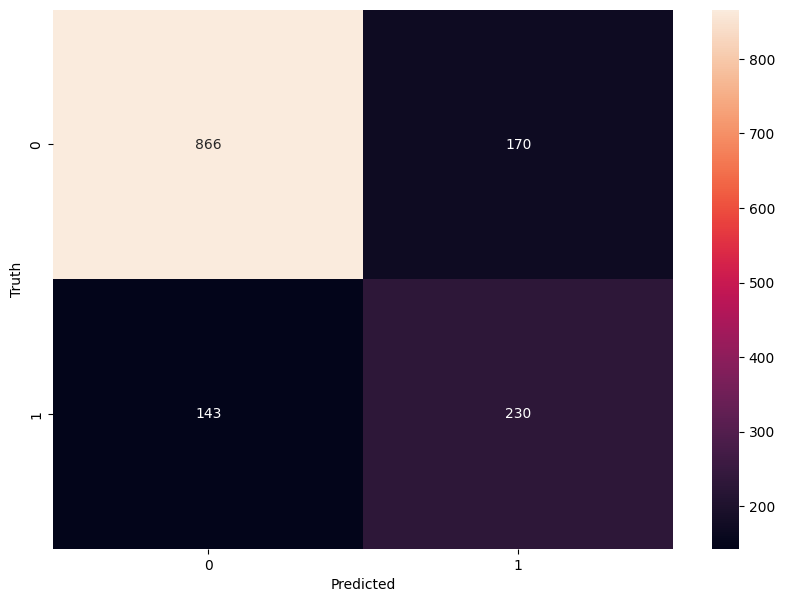

In [59]:
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

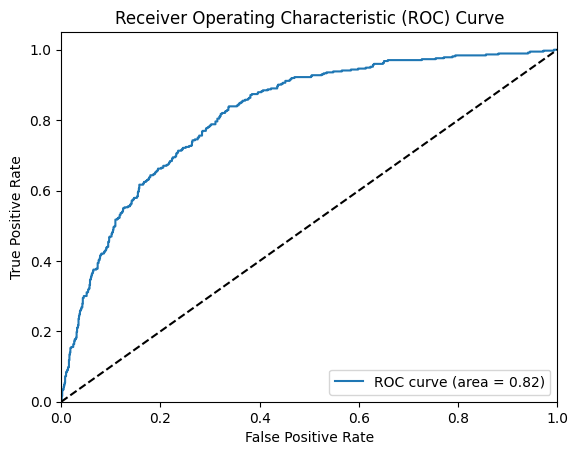

In [58]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
